## Necessary Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, geom_point, geom_line, labs, theme_minimal
from plotnine import *
from dotenv import load_dotenv
import os
import mysql.connector


## Connecting MySQL and fetching the data

In [10]:

load_dotenv("C:/GitHub/Bootcamp-2025-DA/Python/.env")

MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
MYSQL_DATABASE = os.getenv("MYSQL_DATABASE")

db_config = {
    "host": MYSQL_HOST,
    "user": MYSQL_USER,
    "password": MYSQL_PASSWORD,
    "database": MYSQL_DATABASE
}

conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

#  Retail Sales dataset
query = "SELECT * FROM sales_data;"
df = pd.read_sql(query, conn)

# Close connection
cursor.close()
conn.close()

int_columns = ['Age', 'Quantity']  
df[int_columns] = df[int_columns].astype(int)

df['Transaction_ID'] = df['Transaction_ID'].astype(str)

# Display the DataFrame without decimal points
pd.options.display.float_format = '{:,.0f}'.format
df.head(100)


C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\3647335159.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


,Transaction_ID,Transaction_Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_Per_Unit,Total_Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,"1,000"
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
95,96,2023-12-19,CUST096,Female,44,Clothing,2,300,600
96,97,2023-10-13,CUST097,Female,51,Beauty,2,500,"1,000"
97,98,2023-04-23,CUST098,Female,55,Beauty,2,50,100
98,99,2023-12-17,CUST099,Female,50,Electronics,4,300,"1,200"


In [11]:
df.info()  # Check column data types
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1000 non-null   object 
 1   Transaction_Date  1000 non-null   object 
 2   Customer_ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product_Category  1000 non-null   object 
 6   Quantity          1000 non-null   int64  
 7   Price_Per_Unit    1000 non-null   float64
 8   Total_Amount      1000 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


Transaction_ID      0
Transaction_Date    0
Customer_ID         0
Gender              0
Age                 0
Product_Category    0
Quantity            0
Price_Per_Unit      0
Total_Amount        0
dtype: int64

In [12]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

## Basic Analysis

In [13]:
print(f"Total Transactions: {df['Transaction_ID'].nunique()}")
print(f"Total Revenue: ${df['Total_Amount'].sum():,.2f}")


Total Transactions: 1000
Total Revenue: $456,000.00


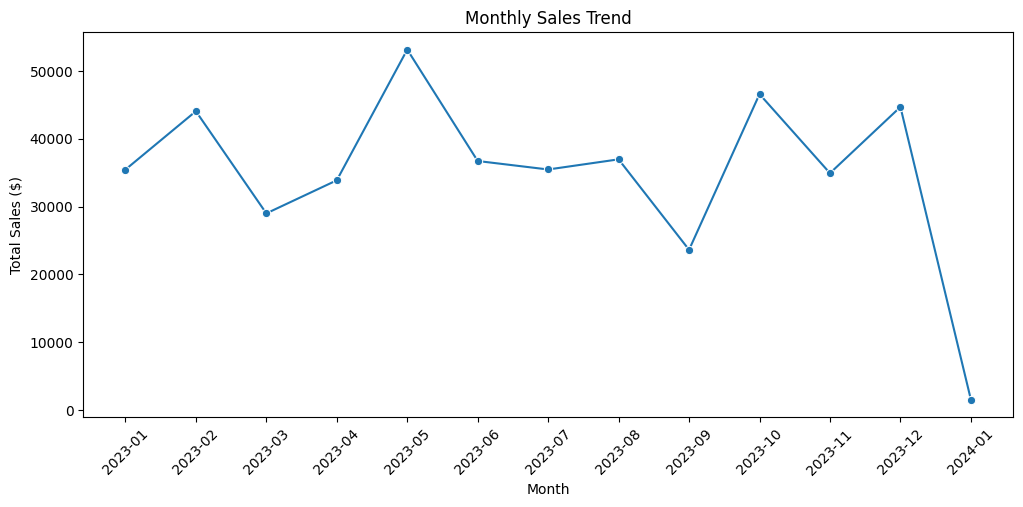

In [22]:
df['month'] = df['Transaction_Date'].dt.to_period('M')
monthly_sales = df.groupby('month')['Total_Amount'].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()


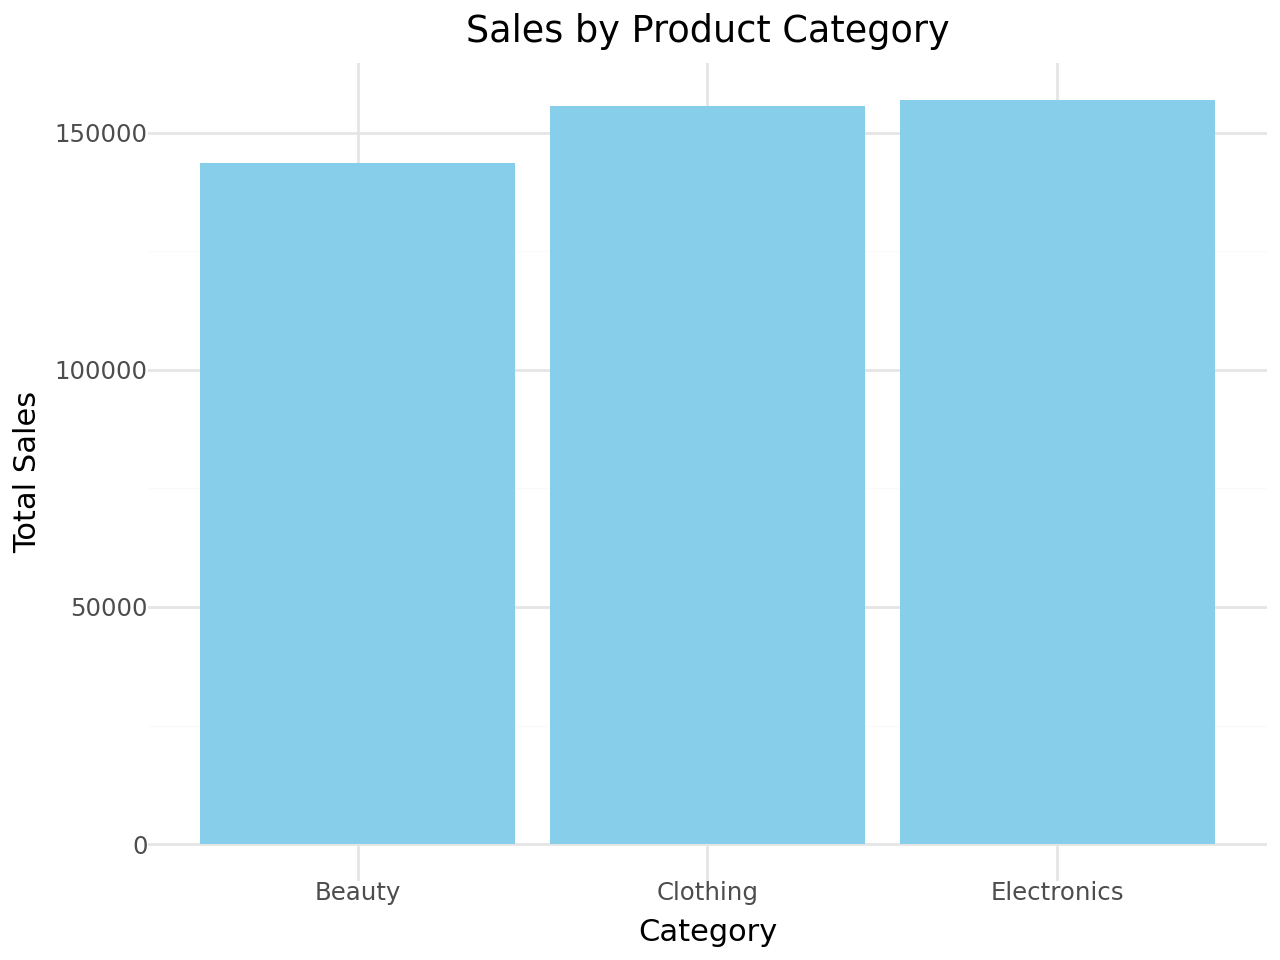

In [15]:
ggplot(df, aes(x='Product_Category', y='Total_Amount')) + \
    geom_bar(stat="identity", fill="skyblue") + \
    labs(title="Sales by Product Category", x="Category", y="Total Sales") + \
    theme_minimal()


C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\3348031202.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\3348031202.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



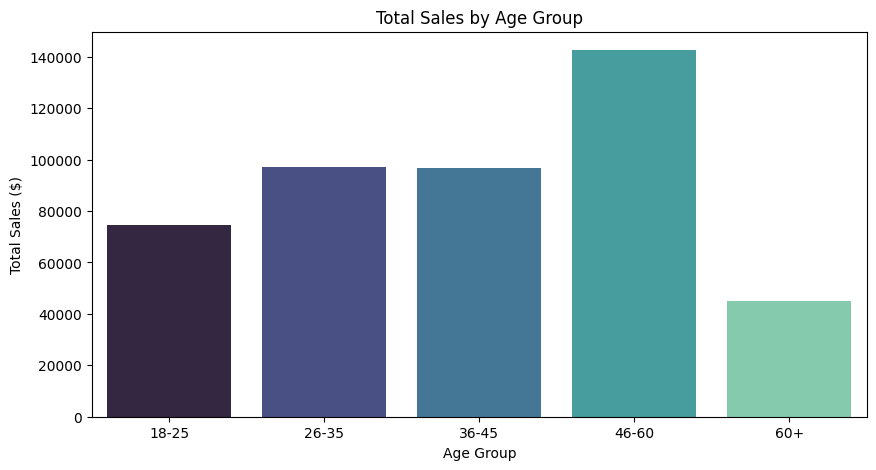

In [16]:
age_bins = [18, 25, 35, 45, 60, 100]
age_labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sales_by_age = df.groupby('age_group')['Total_Amount'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette="mako")
plt.title("Total Sales by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Sales ($)")
plt.show()


In [23]:
# Define Age Bins
age_bins = [18, 25, 35, 45, 60, 100]
age_labels = ['18-25', '26-35', '36-45', '46-60', '60+']

# Create Age Groups
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Sales Aggreation by Product Categiry and Age Groups
sales_pivot = df.groupby(['Product_Category', 'age_group'])['Total_Amount'].sum().reset_index()

# Generate a pivot table of Product Categroya, Age Group and Total Sales
sales_pivot = sales_pivot.pivot(index='Product_Category', columns='age_group', values='Total_Amount')

# Visualise the pivot
sales_pivot


C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\373703786.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


age_group,18-25,26-35,36-45,46-60,60+
Product_Category,,,,,
Beauty,"28,905","28,540","29,450","51,000","5,620"
Clothing,"22,160","41,640","30,925","45,725","15,130"
Electronics,"23,585","26,910","36,460","45,885","24,065"


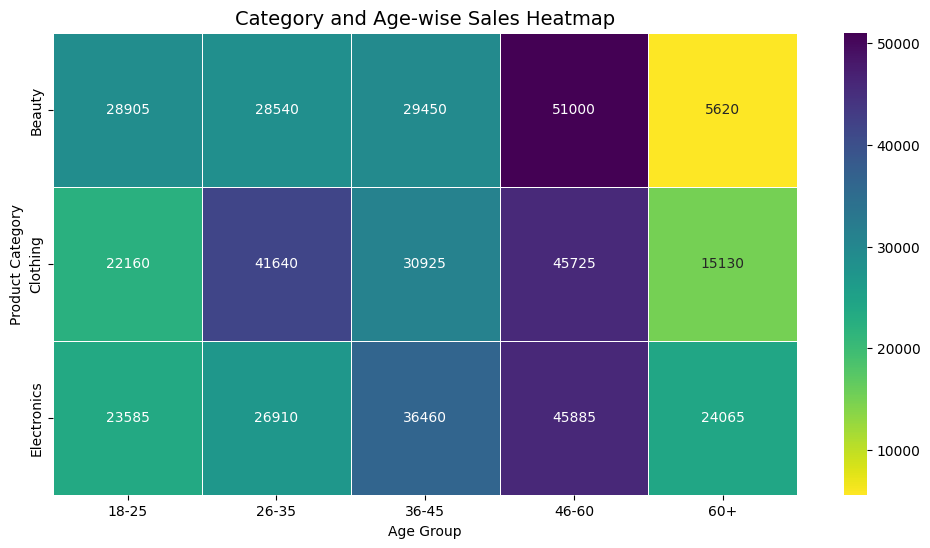

In [24]:
# Figure Size
plt.figure(figsize=(12, 6))

# Create Heatmap Table using reversed color pallette darker the higher total amount
sns.heatmap(sales_pivot, cmap="viridis_r", annot=True, fmt=".0f", linewidths=0.5)

# Titles and Labels
plt.title("Category and Age-wise Sales Heatmap", fontsize=14)

plt.ylabel("Product Category")
plt.xlabel("Age Group")

# Show Plot
plt.show()


C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\248730560.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\Mahes\AppData\Local\Temp\ipykernel_30336\248730560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



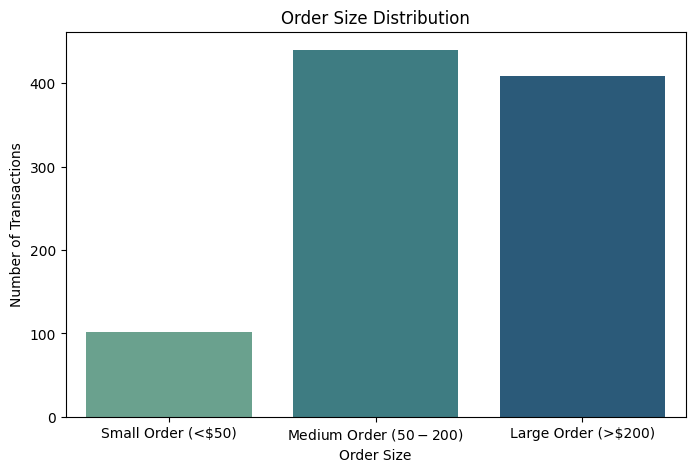

In [25]:
order_bins = [0, 50, 200, df['Total_Amount'].max()]
order_labels = ['Small Order (<$50)', 'Medium Order ($50-$200)', 'Large Order (>$200)']
df['order_size'] = pd.cut(df['Total_Amount'], bins=order_bins, labels=order_labels, right=False)

order_distribution = df.groupby('order_size')['Transaction_ID'].count()

plt.figure(figsize=(8, 5))
sns.barplot(x=order_distribution.index, y=order_distribution.values, palette="crest")
plt.title("Order Size Distribution")
plt.xlabel("Order Size")
plt.ylabel("Number of Transactions")
plt.show()
